In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('notebook_repr_html',True)

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'league',
              'transition': 'fade',
              'center': 'false',
              'overview' : 'true',
              'start_slideshow_at': 'selected'
})

%matplotlib inline

# Quick and Dirty Introduction to Keras

[Fabio A. González](http://dis.unal.edu.co/~fgonza/), Universidad Nacional de Colombia

## Keras
### Deep Learning library for Theano and TensorFlow (https://keras.io/)


* Allows for easy and fast prototyping (through total modularity, minimalism, and extensibility).
* Supports both convolutional networks and recurrent networks, as well as combinations of the two.
* Supports arbitrary connectivity schemes (including multi-input and multi-output training).
* Runs seamlessly on CPU and GPU.

## The Little Red Riding Hood Neural Network

<img src="http://themaleharem.com/wp-content/uploads/2014/06/Walter-crane-little-red-riding-hood-meets-the-wolf-in-the-woods.jpg">

## LRRH Network Architecture

<img src="lrrh_net.jpg" width="600">

## Defining a neural network model


In [37]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=3, input_dim=4))
model.add(Activation("sigmoid"))
model.add(Dense(units=4))
model.add(Activation("sigmoid"))

model.compile(loss='mse', 
              optimizer=SGD(lr = 1))

In [38]:
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_15 (Dense)               (None, 3)                   15         
______________________________________________________________________
activation_15 (Activation)     (None, 3)                   0          
______________________________________________________________________
dense_16 (Dense)               (None, 4)                   16         
______________________________________________________________________
activation_16 (Activation)     (None, 4)                   0          
Total params: 31
Trainable params: 31
Non-trainable params: 0
______________________________________________________________________


In [39]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Training data


In [40]:
X = [[1,1,0,0], [1,0,1,0], [0,0,0,1]]
Y = [[1,0,0,0], [0,0,1,1], [0,1,1,0]]
df = pd.DataFrame(X, columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled'])
df.join(pd.DataFrame(Y, columns=['Scream', 'Hug', 'Food', 'Kiss']))

,Big Ears,Big Teeth,Handsome,Wrinkled,Scream,Hug,Food,Kiss
0,1,1,0,0,1,0,0,0
1,1,0,1,0,0,0,1,1
2,0,0,0,1,0,1,1,0


## Training

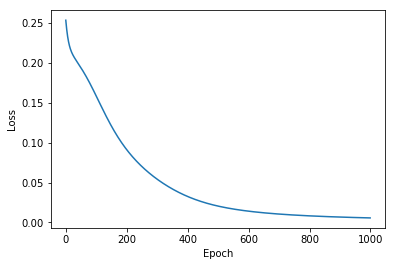

In [41]:
history = model.fit(X, Y, epochs=1000, batch_size=3,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

## Prediction

In [42]:
def lrrh_input(vals):
    return pd.DataFrame(vals.T,index=['big ears', 'big teeth', 'handsome', 'wrinkled'], columns=['input'])

def lrrh_output(vals):
    return pd.DataFrame(vals.T,index=['scream', 'hug', 'offer food', 'kiss cheek'], columns=['output'])

In [43]:
in_vals = np.array([[1, 1, 0, 0]])
print(lrrh_input(in_vals))
print(lrrh_output(model.predict(in_vals)[0]))

           input
big ears       1
big teeth      1
handsome       0
wrinkled       0
              output
scream      0.913866
hug         0.054541
offer food  0.092757
kiss cheek  0.073932


## Internal representation

In [44]:
from keras import backend as K
get_internal = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[1].output]) 

In [45]:
df = pd.DataFrame(X, columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled'])
df = df.join(pd.DataFrame(get_internal([X,0])[0], columns=['N1', 'N2', 'N3']))
df.join(pd.DataFrame(Y, columns=['Scream', 'Hug', 'Food', 'Kiss'])) 

,Big Ears,Big Teeth,Handsome,Wrinkled,N1,N2,N3,Scream,Hug,Food,Kiss
0,1,1,0,0,0.033244,0.969636,0.775838,1,0,0,0
1,1,0,1,0,0.965165,0.955652,0.136372,0,0,1,1
2,0,0,0,1,0.805376,0.038620,0.846062,0,1,1,0
